<a href="https://colab.research.google.com/github/sashwot/DataScience/blob/main/Neural_Network_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network Project:

Predicting the likelihood that eBay auction is a shilling scheme


In [ ]:
#importing python libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df_shill = pd.read_csv("/content/Shill_Bidding.csv")
display(df_shill)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [ ]:
display(df_shill.head(10))
df_shill.info()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
5,8,900,i***e,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,7,0
6,10,900,m***p,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,7,0
7,12,900,k***a,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,7,1
8,13,2370,g***r,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,7,1
9,27,600,e***t,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,7,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


Choosing the Class column as a classifier

In [ ]:
df_shill["Class"].value_counts()

Class
0    5646
1     675
Name: count, dtype: int64

Using pair plot to see the balance between data.


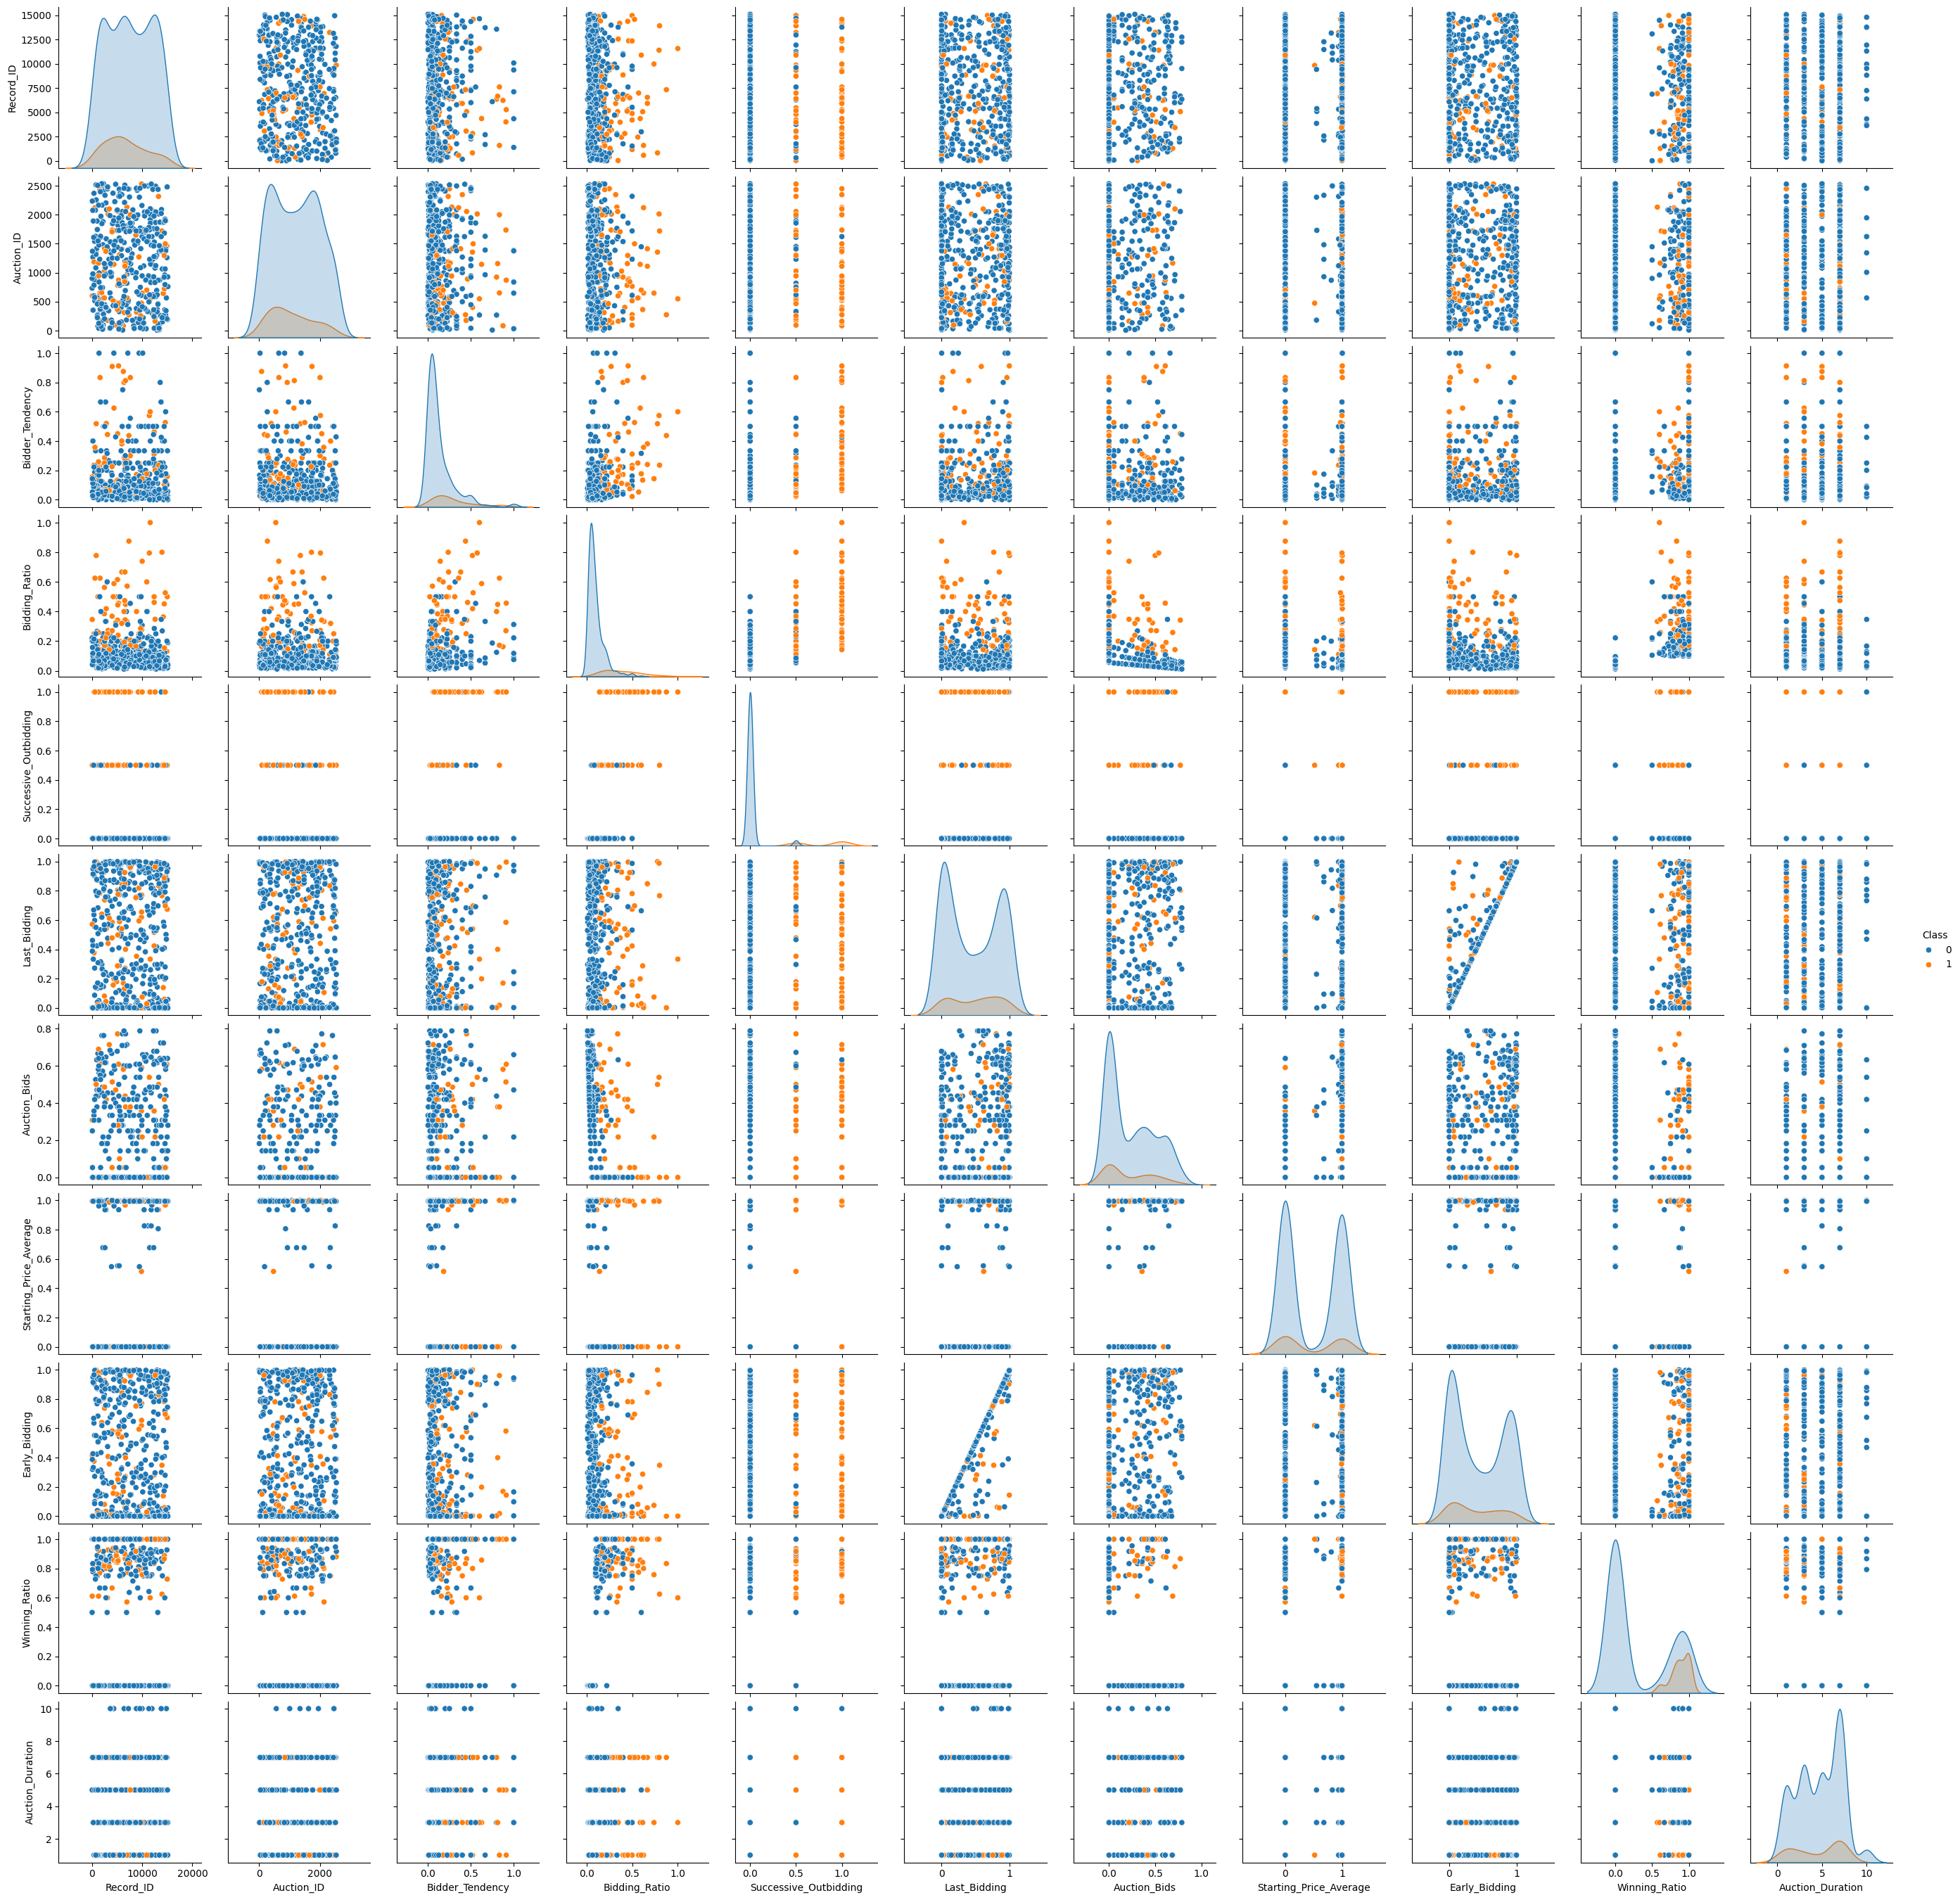

In [ ]:
sns.pairplot(data=df_shill.sample(500), hue="Class")

In [ ]:
#balancing the data file
df_balanced = pd.concat([df_shill[df_shill["Class"] == 1], df_shill[df_shill["Class"] == 0].sample(675)])
display(df_balanced.info())
display(df_balanced["Class"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 1350 entries, 7 to 1029
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               1350 non-null   int64  
 1   Auction_ID              1350 non-null   int64  
 2   Bidder_ID               1350 non-null   object 
 3   Bidder_Tendency         1350 non-null   float64
 4   Bidding_Ratio           1350 non-null   float64
 5   Successive_Outbidding   1350 non-null   float64
 6   Last_Bidding            1350 non-null   float64
 7   Auction_Bids            1350 non-null   float64
 8   Starting_Price_Average  1350 non-null   float64
 9   Early_Bidding           1350 non-null   float64
 10  Winning_Ratio           1350 non-null   float64
 11  Auction_Duration        1350 non-null   int64  
 12  Class                   1350 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 147.7+ KB


None

Class
1    675
0    675
Name: count, dtype: int64

In [ ]:
display(df_balanced.describe())

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,7440.561481,1243.027407,0.219563,0.222167,0.423704,0.504265,0.241930,0.509303,0.450689,0.592750,4.751111,0.500000
std,4325.084179,731.296553,0.245727,0.192070,0.448737,0.376142,0.253418,0.490525,0.380585,0.417700,2.496012,0.500185
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3728.750000,589.000000,0.046648,0.071429,0.000000,0.093334,0.000000,0.000000,0.036733,0.000000,3.000000,0.000000
50%,7477.500000,1285.000000,0.116667,0.166667,0.500000,0.554288,0.162338,0.825259,0.416037,0.806452,5.000000,0.500000
75%,10995.500000,1853.500000,0.300000,0.314286,1.000000,0.888256,0.470588,0.993593,0.847222,0.926829,7.000000,1.000000
max,15139.000000,2534.000000,1.000000,1.000000,1.000000,0.999820,0.788235,0.999935,0.999602,1.000000,10.000000,1.000000


In [ ]:
df_balanced.columns

Index(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')

In [ ]:
scaling_cols = ['Record_ID', 'Auction_ID', 'Last_Bidding', 'Auction_Duration']

Extracting the categorical columns


In [ ]:
# Making Predictions
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
df_nn = df_balanced.copy()
df_nn[scaling_cols] = scaler.fit_transform(df_balanced[scaling_cols])
display(df_nn.describe())
display(df_nn.info())

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,1.350000e+03,1.350000e+03,1350.000000,1350.000000,1350.000000,1.350000e+03,1350.000000,1350.000000,1350.000000,1350.000000,1.350000e+03,1350.000000
mean,-1.447402e-17,-1.355294e-16,0.219563,0.222167,0.423704,4.210624e-17,0.241930,0.509303,0.450689,0.592750,-5.263280e-17,0.500000
std,1.000371e+00,1.000371e+00,0.245727,0.192070,0.448737,1.000371e+00,0.253418,0.490525,0.380585,0.417700,1.000371e+00,0.500185
min,-1.720734e+00,-1.693549e+00,0.000000,0.011765,0.000000,-1.341121e+00,0.000000,0.000000,0.000000,0.000000,-1.503399e+00,0.000000
25%,-8.585236e-01,-8.946709e-01,0.046648,0.071429,0.000000,-1.092894e+00,0.000000,0.000000,0.036733,0.000000,-7.018235e-01,0.000000
50%,8.543697e-03,5.741603e-02,0.116667,0.166667,0.500000,1.330389e-01,0.162338,0.825259,0.416037,0.806452,9.975157e-02,0.500000
75%,8.222397e-01,8.350905e-01,0.300000,0.314286,1.000000,1.021245e+00,0.470588,0.993593,0.847222,0.926829,9.013267e-01,1.000000
max,1.780611e+00,1.765974e+00,1.000000,1.000000,1.000000,1.317954e+00,0.788235,0.999935,0.999602,1.000000,2.103689e+00,1.000000


<class 'pandas.core.frame.DataFrame'>
Index: 1350 entries, 7 to 1029
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               1350 non-null   float64
 1   Auction_ID              1350 non-null   float64
 2   Bidder_ID               1350 non-null   object 
 3   Bidder_Tendency         1350 non-null   float64
 4   Bidding_Ratio           1350 non-null   float64
 5   Successive_Outbidding   1350 non-null   float64
 6   Last_Bidding            1350 non-null   float64
 7   Auction_Bids            1350 non-null   float64
 8   Starting_Price_Average  1350 non-null   float64
 9   Early_Bidding           1350 non-null   float64
 10  Winning_Ratio           1350 non-null   float64
 11  Auction_Duration        1350 non-null   float64
 12  Class                   1350 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 147.7+ KB


None

In [ ]:
from sklearn.model_selection import train_test_split

features = df_nn.iloc[:,3:-1]
lbls = df_nn.iloc[:, -1]

x_train, x_test,y_train, y_test = train_test_split(features, lbls, train_size=0.2, shuffle=True, random_state=123)

Neural Network Model

In [ ]:
ann_model = tf.keras.models.Sequential()
#Hidden layers
ann_model.add(tf.keras.layers.Dense(units=12, activation="relu"))
ann_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
ann_model.add(tf.keras.layers.Dense(units=8, activation="relu"))

#output layers
ann_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [ ]:
ann_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

Traning the neural network model

In [ ]:
ann_model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
9/9 [==============================] - 3s 4ms/step - loss: 0.6801 - accuracy: 0.5481
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.6519
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.7148
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6305 - accuracy: 0.7630
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6080 - accuracy: 0.8037
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5842 - accuracy: 0.8074
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5590 - accuracy: 0.8074
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5320 - accuracy: 0.8222
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5025 - accuracy: 0.8556
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.8778
Epoch 11/100
9/9 [===========

In [ ]:
def nn_evaluator(y_hat, y_test, modelName):
  from sklearn import metrics

  acc = metrics.accuracy_score(y_test, y_hat)
  prec = metrics.precision_score(y_test, y_hat)
  rec = metrics.recall_score(y_test, y_hat)
  f1 = metrics.f1_score(y_test, y_hat)

  conf_matrix = metrics.confusion_matrix(y_test, y_hat)

  print("\n" *2)
  print("**" * 5)
  print(modelName)
  print("**" * 5)

  print("Accuracy: ", acc)
  print("Prediction: ", prec)
  print("Recall: ", rec)
  print("F1 Score: ", f1)
  print("Confusion Matrix: \n", conf_matrix)

  return {"acc": acc, "prec" : prec, "recall" : rec, "f1_score": f1, "conf_matrix": conf_matrix}






In [ ]:
y_pred = ann_model.predict(x_test)
y_hat = (y_pred >= 0.5) * 1
y_hat

34/34 [==============================] - 0s 2ms/step


array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

Evaluating the Neural Network Model

In [ ]:
nn_evaluator(y_hat = y_hat, y_test = y_test, modelName = "Artificial Neural Network")




**********
Artificial Neural Network
**********
Accuracy:  0.9861111111111112
Prediction:  0.9867172675521821
Recall:  0.9848484848484849
F1 Score:  0.985781990521327
Confusion Matrix: 
 [[545   7]
 [  8 520]]


{'acc': 0.9861111111111112,
 'prec': 0.9867172675521821,
 'recall': 0.9848484848484849,
 'f1_score': 0.985781990521327,
 'conf_matrix': array([[545,   7],
        [  8, 520]])}